# Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive\3.1-data-sheet-udemy-courses-business-courses.csv
archive\3.1-data-sheet-udemy-courses-design-courses.csv
archive\3.1-data-sheet-udemy-courses-music-courses.csv
archive\3.1-data-sheet-udemy-courses-web-development.csv
archive\Entry Level Project Sheet - 3.1-data-sheet-udemy-courses-web-development.csv


## import other libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"D:\NEW PROJECTS\Udemy courses analysis\archive\3.1-data-sheet-udemy-courses-business-courses.csv", encoding="latin-1")
df.head()


,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            1191 non-null   float64
 1   course_title         1191 non-null   object 
 2   url                  1191 non-null   object 
 3   price                1191 non-null   float64
 4   num_subscribers      1191 non-null   float64
 5   num_reviews          1191 non-null   float64
 6   num_lectures         1191 non-null   float64
 7   level                1191 non-null   object 
 8   Rating               1192 non-null   float64
 9   content_duration     1191 non-null   float64
 10  published_timestamp  1191 non-null   object 
 11  subject              1191 non-null   object 
dtypes: float64(7), object(5)
memory usage: 111.9+ KB


### breaking down the timestamp

In [6]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            1191 non-null   float64            
 1   course_title         1191 non-null   object             
 2   url                  1191 non-null   object             
 3   price                1191 non-null   float64            
 4   num_subscribers      1191 non-null   float64            
 5   num_reviews          1191 non-null   float64            
 6   num_lectures         1191 non-null   float64            
 7   level                1191 non-null   object             
 8   Rating               1192 non-null   float64            
 9   content_duration     1191 non-null   float64            
 10  published_timestamp  1191 non-null   datetime64[ns, UTC]
 11  subject              1191 non-null   object             
dtypes: datetime64[ns, UT

In [8]:
df.sample(6)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
1098,849632.0,Write a Successful Business Grant Proposal,https://www.udemy.com/write-a-successful-busin...,20.0,6.0,0.0,23.0,All Levels,0.24,2.500000,2016-07-10 17:11:15+00:00,Business Finance
922,476880.0,Financial Model Fundamentals-Learn the Essenti...,https://www.udemy.com/financial-model-fundamen...,75.0,47.0,5.0,27.0,Intermediate Level,0.95,2.500000,2015-06-01 20:58:11+00:00,Business Finance
1172,975910.0,How to achieve personal transformation,https://www.udemy.com/learnhowtocreatewealth/,20.0,0.0,0.0,10.0,Beginner Level,0.47,0.533333,2016-12-22 00:28:07+00:00,Business Finance
700,662318.0,Learn Quickbooks to maintain books properly,https://www.udemy.com/learn-quickbooks-to-main...,20.0,241.0,5.0,26.0,All Levels,0.20,2.500000,2015-11-09 20:36:53+00:00,Business Finance
770,892446.0,Visualizing Data,https://www.udemy.com/visualizing-data/,40.0,149.0,2.0,63.0,Intermediate Level,0.80,6.500000,2016-07-22 13:09:03+00:00,Business Finance
793,73938.0,CFA Level I Workshop 2: Financial Reporting & ...,https://www.udemy.com/cfa-workshop-2/,20.0,126.0,2.0,5.0,Intermediate Level,0.80,1.000000,2013-08-12 13:26:27+00:00,Business Finance


### data cleaning
#### check if duplicated

In [9]:
df[df.duplicated()]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject


#### check if null

In [10]:
df[df.isnull()]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [11]:
df.isnull().sum()


course_id              1
course_title           1
url                    1
price                  1
num_subscribers        1
num_reviews            1
num_lectures           1
level                  1
Rating                 0
content_duration       1
published_timestamp    1
subject                1
dtype: int64

In [12]:
df.dropna(inplace=True)


In [13]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

### visualizing the data
#### categorical data
#### numerical data

In [14]:
level_count = df['level'].value_counts()
print(level_count)

level
All Levels            633
Beginner Level        399
Intermediate Level    134
Expert Level           25
Name: count, dtype: int64


### all courses in all level

Text(0, 0.5, 'Counts')

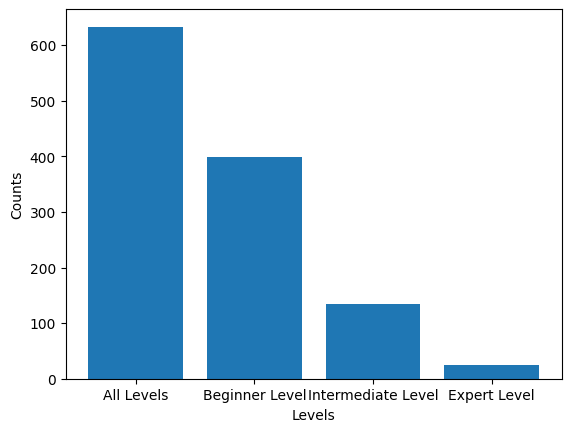

In [15]:
plt.bar(level_count.index,level_count.values)
plt.xlabel('Levels')
plt.ylabel('Counts')

([<matplotlib.patches.Wedge at 0x285f70146b0>,
 [Text(-0.1283821029759477, 1.2936452510775407, 'All Levels'),
  Text(-0.40954098409873024, -1.2338055691005145, 'Beginner Level'),
  Text(1.0614132895597592, -0.5598230334185358, 'Intermediate Level'),
  Text(1.197391739418621, -0.07907605435306853, 'Expert Level')])

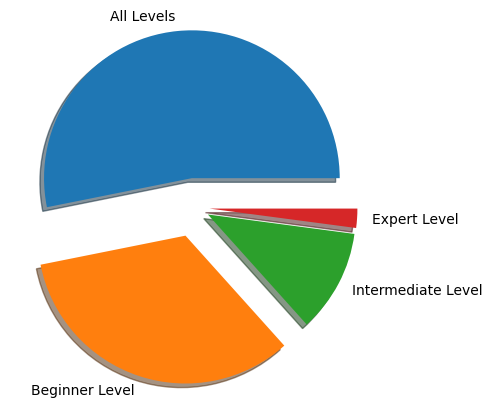

In [16]:
plt.pie(x=level_count.values,labels=level_count.index,explode=[0.2,0.2,0.1,0.1],shadow=True)